# 2014 Seattle Crime Visualization Using Google Map

# Introduction: 

This analysis focuses on exploring high crime density areas in downtown Seattle. We select area of interest trying to find out what weekday and what time is most likely to have high crime activity. We also summarized during the most 'dangerous' time, what are the top types of crimes observed.

In [3]:
library(ggplot2)
library(ggmap)
library("doBy")
## library(plyr)

# Data prep and map selection:

In [4]:
# Set locale to English to make sure datetime is formated currectly
Sys.setlocale("LC_TIME", "English")
data<-read.csv("seattle_incidents_summer_2014.csv",header=TRUE,sep=",",colClasses=c(rep("NULL",each=6),
            "factor","NULL",'character',rep("NULL",each=5),rep("double",each=2),"NULL",rep("factor",each=2)),na.strings=NA)
data$DateTime<-strptime(data$Occurred.Date.or.Date.Range.Start,format="%m/%d/%Y %I:%M:%S %p")
data$Hour <- as.character(format(data$DateTime, "%H"))
data$WeekDay <- as.factor(format(data$DateTime, "%a"))

[1] "English_United States.1252"

Load Seattle map from Google Map package and set center as Seattle

In [6]:
center<-as.numeric(geocode("Seattle, Washington"))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20Washington&sensor=false


Set the map zoom level to downtown Seattle because we want to focus on high population density area

In [7]:
SeattleMap <- ggmap(get_googlemap(center=center, scale=2, zoom=14), extent="normal") 

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.606209,-122.332071&zoom=14&size=640x640&scale=2&maptype=terrain&sensor=false


In [8]:
# Get longtitute and latitude range from map
lon_up_bounds <- max(SeattleMap$data["lon"])
lon_low_bounds <- min(SeattleMap$data["lon"])
lat_up_bounds <- max(SeattleMap$data["lat"])
lat_low_bounds <- min(SeattleMap$data["lat"])
# Extract crime occured within current map range and remove NA data
data<-data[data$Longitude<=lon_up_bounds & data$Latitude<=lat_up_bounds 
           & data$Longitude>=lon_low_bounds & data$Latitude>=lat_low_bounds,]

# Key finding:

The heat map shows how crime activity distribute across the current map area. Level in the graph represent how many crimes occured. A high level means this area has more occurance of crime activities compared to other areas

As we can see, there's three areas have high density of crime occurance: Pike Place Market, Pioneer Square and Seattle University.

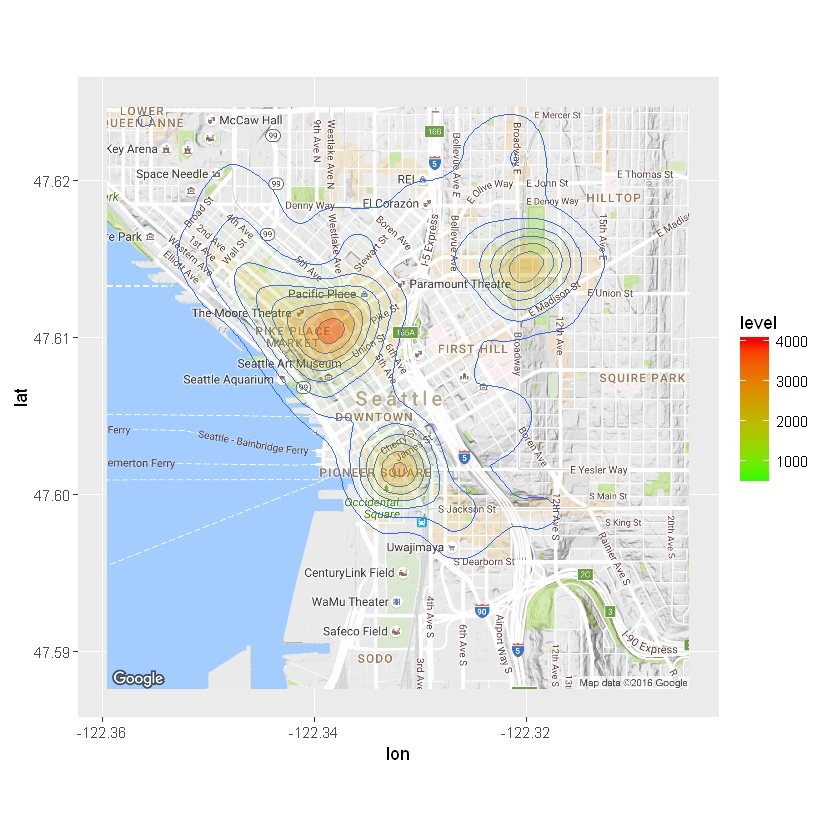

In [9]:
# Map the crime data to look at the crime geographically distribution
SeattleMap + geom_density2d(aes(x=Longitude, y=Latitude), data=data , size=0.3) + 
stat_density2d(data=data,aes(x=Longitude, y=Latitude, fill = ..level.., alpha = ..level..),size = 0.1, geom = "polygon") +
scale_fill_gradient(low = "green", high = "red") + scale_alpha(range = c(0, 0.2), guide = FALSE)

Our next step is to map crime density to hour, in order to explore what's the crime occurrence pattern during the day

We can clearly see during 3 am to 8 am there are no high crime observed in all areas. Starting from 9 am to 7 pm, more crimes are observed in Pike Place Market and Pioneer Square. Area around Seattle University is observed to have extremely high density of crime during 23 pm to 2 am.

Pike Place Market and Pioneer Square are not surprising because they are higher population during day time in these areas. What is surprising is during the night time the high crime activity around Seattle University area. We decide focus on this area for further analysis.

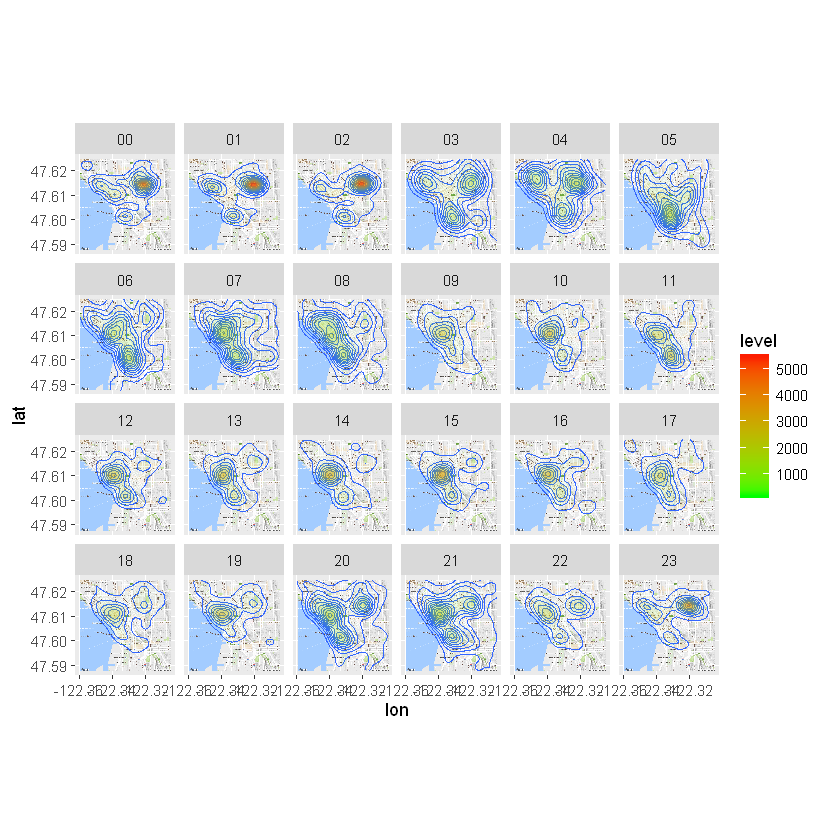

In [17]:
SeattleMap + geom_density2d(aes(x=Longitude, y=Latitude), data=data, size=0.3) + facet_wrap( ~ Hour, ncol=6) +
stat_density2d(data=data,aes(x=Longitude, y=Latitude, fill = ..level.., alpha = ..level..),size = 0.1, geom = "polygon") +
scale_fill_gradient(low = "green", high = "red") + scale_alpha(range = c(0, 0.3), guide = FALSE)

In [10]:
night<-data[data$Longitude<=-122.31 & data$Latitude<=47.62 & data$Longitude>=-122.33 & data$Latitude>=47.61,]
night<-night[night$Hour=='00' | night$Hour=='01' | night$Hour=='02' | night$Hour=='23',]

Around US campus area from 23 pm to 2 am, crime occurs more often on Friday and during the weekend. This probably related to more people go to the bar around that area during the weekend.

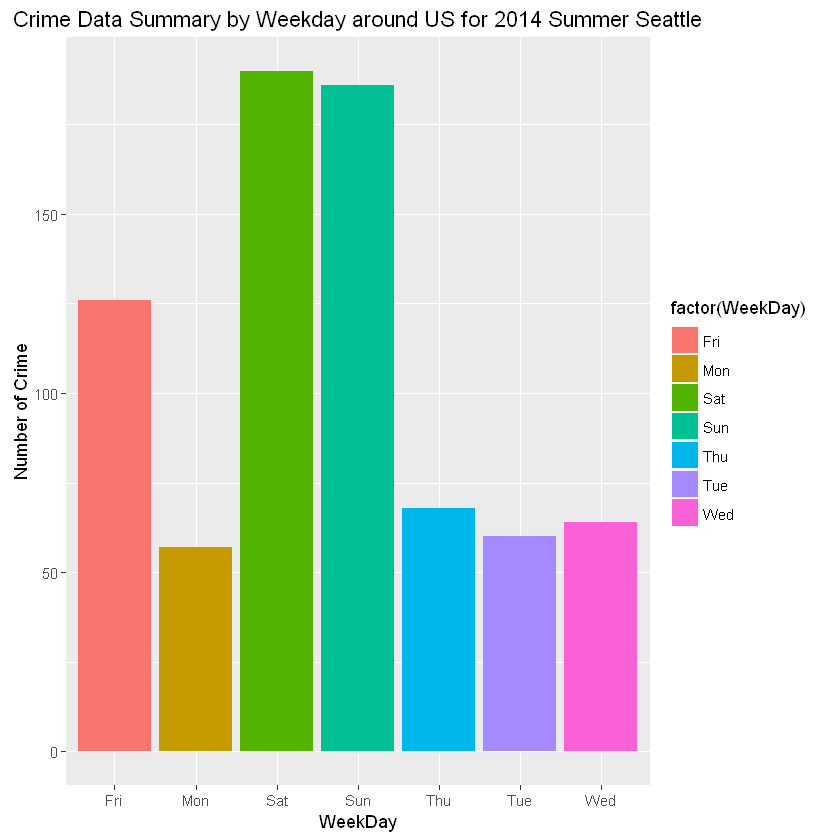

In [11]:
# Explore the the specific area to know the crime breakdown
ggplot(night,aes(x=WeekDay,fill=factor(WeekDay)))+geom_bar(nrow(data$DateTime)) + xlab("WeekDay") + 
ylab("Number of Crime") + ggtitle("Crime Data Summary by Weekday around US for 2014 Summer Seattle")

Carprowl, property damage and assault are most common crimes during 23 pm to 2 am


      CAR PROWL         ASSAULT  OTHER PROPERTY         ROBBERY PROPERTY DAMAGE 
            172             122             108              49              44 


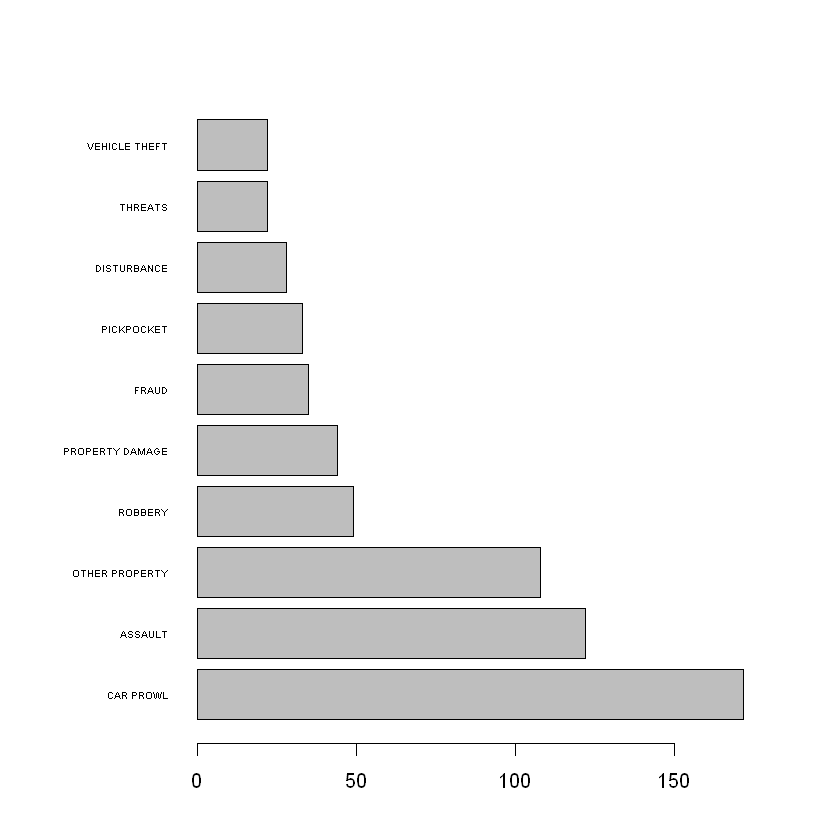

In [45]:
par(mar=c(4,8,4,4))
barplot(sort(table(night$Summarized.Offense.Description),decreasing = T)[1:10],horiz = T,las=1,cex.names=0.5)

# Conclusion:

For downtown Seattle, Pike Place Market, Pioneer Square and Seattle University are three areas observed to have most crimes. Seattle University area has peak crime activity from 23 pm to 2 am during weekend. Carprowl property damage and assault are the top types of crimes.